# Майнор по Анализу Данных, Группа ИАД-2
## Домашнее задание №2: Классификация текстовых данных

<hr\>
В задании вы будете решать задачу бинарной классификации текстов. Вы познакомитесь с основными инструментами sklearn, необходимыми для обработки текстов. Перед применением методов sklearn внимательно читайте документацию к ним: это полезно и помогает делать меньше ошибок.

**Общая информация**

**Срок сдачи:** 1 мая 2017, 9:00 <br\>

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com`, X = 3 или 4 (ИАД 3 или ИАД4), указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [HW2, ИАД-X] Фамилия Имя **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.
__Старайтесь не копировать похожие участки кода. Везде, где это возможно, оформляйте код в функцию.__

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

<p>Чтобы узнать свой вариант, введите Вашу фамилию на русском языке в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
name = "БобровскихГлеб" # Ваши ФамилияИмя

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in name.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<p><b>Варианты</b></p>

В зависимости от варианта нужно будет научиться определять...

**1.** ...является ли SMS сообщение спамом? 
* Зайдите на [страничку с данными](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) на сайте репозитория UCI.
* Нажмите на «Data Folder», скачайте и распакуйте архив.
* Открыть SMSSpamCollection можно с помощью pd.read_csv, указав `sep='\t'`.

**2.** ...положительна или отрицательна рецензия на фильм?
* Зайдите на [страничку с данными](http://www.cs.cornell.edu/people/pabo/movie-review-data/) на сайте Корнельского университета.
* Нажмите на «polarity dataset v2.0» и распакуйте архив. 
* Каждый текстовый файл соответствует одной рецензии. Вам придётся [построить список всех файлов в папке](http://stackoverflow.com/questions/3207219/how-to-list-all-files-of-a-directory), а затем последовательно открыть их и прочитать тексты

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import re
def convert_text(s):
    # Removes all characters from string except letters and digits and convert letters to lowercase
    return re.sub("[^a-zA-Z0-9]", " ", s.lower())
#explain regular expression:
#

In [20]:
from os import listdir
from os.path import isfile, join
mypath = '/home/bobrg/anaconda3/txt_sentoken/pos'
txt = []
txt = [convert_text(open(join(mypath, f), 'r').read())for f in listdir(mypath)
             if isfile(join(mypath, f))]
labels = [1] * len(txt)
mypath = '/home/bobrg/anaconda3/txt_sentoken/neg'
txt.extend([convert_text(open(join(mypath, f), 'r').read()) for f in listdir(mypath)
                               if isfile(join(mypath, f))])
labels.extend([0] * (len(txt) - len(labels)))

In [21]:
len(txt)

2000

## Задача 1
#### Классификация текстовых сообщений (2 балла)

<ol>
    <li>Загрузите исходные данные --- список текстов и список соответствующих им меток</li>
    <li>Разбейте объекты на обучающее (train) и тестовое подможества (test) в пропорции 7:3</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настраивать только на обучающем подмножестве, n-gram=1, слова приведите в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [22]:
random_state = 12345 # для всех объектов/методов/моделей

Параметры логистической регрессии
```
penalty='l2'
fit_intercept=True
max_iter=100
C=1
solver="lbfgs"
random_state=12345
```

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(txt, labels, test_size=0.3, random_state=12345)
X = X_train + X_test
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [41]:
len(X_train) / len(X)

0.7

### Векторизация текстов

EXPAND!

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tr = TfidfVectorizer(lowercase=True,ngram_range=(1,1))
df_train = tr.fit_transform(X_train)


In [43]:
df_train

<1400x33847 sparse matrix of type '<class 'numpy.float64'>'
	with 462281 stored elements in Compressed Sparse Row format>

Another way to make transformation:
```
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1, 1))
df = count_vec.fit_transform(X_train).toarray()
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
df_train = pd.DataFrame(data=transformer.fit_transform(df).toarray(),
                       columns=count_vec.get_feature_names())
```
but TfidfVectorizer is more commonly used.

###  Обучение моделей:
* KNN
* Logistic Regression
* MultinomialNaiveBayes

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(df_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
%timeit knc.fit(df_train, y_train)

100 loops, best of 3: 2.19 ms per loop


In [67]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100,
                          C=1, solver="lbfgs", random_state=12345)
logr.fit(df_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12345, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
%timeit logr.fit(df_train, y_train)

10 loops, best of 3: 104 ms per loop


In [48]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(df_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
%timeit mnb.fit(df_train, y_train)

100 loops, best of 3: 6.49 ms per loop


### Построение прогноза на тестовой подвыборке.
Векторизуем тексты из теста и проверим предсказания обученых моделей.

In [74]:
df_test = tr.transform(X_test)
df_test

<600x33847 sparse matrix of type '<class 'numpy.float64'>'
	with 198042 stored elements in Compressed Sparse Row format>

In [75]:
yy_knc = knc.predict(df_test)

In [76]:
from sklearn.metrics import mean_absolute_error, accuracy_score
print('mae:', mean_absolute_error(yy_knc, y_test))
print('accuracy score', accuracy_score(yy_knc, y_test))

mae: 0.415
accuracy score 0.585


In [56]:
%timeit knc.predict(df_test)

1 loop, best of 3: 263 ms per loop


In [77]:
yy_lgr = logr.predict(df_test)

In [78]:
print('mae:', mean_absolute_error(yy_lgr, y_test))
print('accuracy score:', accuracy_score(yy_lgr, y_test))

mae: 0.178333333333
accuracy score: 0.821666666667


In [59]:
%timeit logr.predict(df_test)

1000 loops, best of 3: 586 µs per loop


µs - microseconds - WOW! :D

In [60]:
yy_mnb = mnb.predict(df_test)

In [61]:
print('mae:', mean_absolute_error(yy_mnb, y_test))
print('accuracy score:', accuracy_score(yy_mnb, y_test))

mae: 0.228333333333
accuracy score: 0.771666666667


In [62]:
%timeit mnb.predict(df_test)

1000 loops, best of 3: 1.5 ms per loop


### Пояснения по результатам:

Fitting time:
* Дольше всего настраивается Логистическая регрессия, поскольку ей нужно настроить параметры сигмоиды, чтобы максимизировать функцию правдоподобия. Для этого применяется метод градиентного спуска, который и дает проигрыш во времени настройки.
* Меньше всего времени на настройку тратит модель K Nearest Neighbours, поскольку она лишь запоминает выборку.

Prediction time:
На предсказании модели ведут себя противоположно своему поведению на настройке, т.е.:
* Дольше всего предсказывает модель KNN, поскольку она должна померить расстояния евклидовой метрикой для каждого элемента из теста и каждого элемента из заученого трейна.
* Меньше времени тратит Логистическая регрессия, поскольку ????

What about MNB? (TODO: Expand)

## Задача 2.
#### Применение k-folds (3 балла)

<p>1. Повторите решение задачи 1, но вместо одного разделения на обучение и контроль используйте разбиение k-folds (k=4). Вам понадобится повторить все действия 4 раза. <br>
2. Какой классификатор показывал лучшее/худшее качество на тестовой выборке? А при k-folds разбиении? Как вы думаете, обязательно ли в данной задаче оценивать качество на кросс-валидации, или достаточно отложить контрольную выборку и оценивать качество на ней?</p>

In [79]:
random_state = 12345 # для всех объектов/методов/моделей

In [80]:
from sklearn.model_selection import KFold
def kfold(model, data, labels, k):
    tmp_model = model
    vec = TfidfVectorizer(lowercase=True, ngram_range=(1,1))
    kfld = KFold(n_splits=k, random_state=12345, shuffle=True)
    
    y_pred = np.zeros(len(labels))
    
    for i_train, i_test in kfld.split(data):
        
        Xx_train, Xx_test = vec.fit_transform(data[i_train]), vec.transform(data[i_test])
        
        Yy_train = labels[i_train]
        
        tmp_model.fit(Xx_train, Yy_train)
        
        y_pred[i_test] = tmp_model.predict(Xx_test)
    print(accuracy_score(y_pred, labels))

In [81]:
print('-------------------KNN--------------------')
kfold(knc, np.asarray(txt), np.asarray(labels), 4)
print('-------------------LR--------------------')
kfold(logr, np.asarray(txt), np.asarray(labels), 4)
print('-------------------MNB--------------------')
kfold(mnb, np.asarray(txt), np.asarray(labels), 4)

-------------------KNN--------------------
0.575
-------------------LR--------------------
0.8195
-------------------MNB--------------------
0.7935


### Пояснения по результатам:

KFold разбиение на 4 фолдах улучшело результат предсказания моделей, но если с KNN (при k = 5) улучшение заметное, то с Логистической регрессией и Наивным Байесом улучшения едва заметны.
(WHY? TODO: Expand)

## Задача 3.
#### Выбор модели (5 баллов)

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Рассмотрим следующие варианты значений гиперпараметров для наших классификаторов:  </p>

<p>K-ближайших соседей</p>

In [82]:
ns = np.arange(1, 150, 20) # количество соседей

<p>Логистическая регрессия</p>

In [83]:
cs = np.logspace(-2, 10, 8, base=10) # параметр регуляризации

<p>Мультиномиальный наивный Байес</p>

In [84]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр

<p style="padding-left:15px;"> Найдите оптимальные значения гиперпараметров для классификаторов на кросс-валидации. Для этого постройте графики (гиперпараметр)-(качество) на обучении и валидации. <br> _Пояснение:_ вы разбили обучающую выборку на 4 блока. Для каждого значения гиперпараметра 4 раза повторите следующее: берем 3 блока для обучения, по ним настраиваем  TfIdf и обучаем классификатор, считаем качество на этих блоках (качество на обучении) и на оставшемся (качество на валидации). Итоговое значение качества на обучении для данного значения гиперпараметра - это среднее четырех полученных значений качества на обучении, то же самое с итоговым значением качества на валидации.  <br>
3. 3 настроенные модели обучите на всем обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
4. Повторите шаги 2-4 для n-gram=2<br>
5. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
6. Сделайте выводы по полученным результатам: <ul>
<li>какой метод показал наилучшее качество на обучении? на валидации? на тестовой выборке? Если это разные классификаторы, подумайте, почему так происходит. Если один и тот же, в чем его преимущества перед остальными?</li>
<li>велика ли разница между качеством на обучении и на валидации? на валидации и контроле? Почему так происходит?</li>
<li>что означает n-gram=2? Улучшилось ли качество при переходе от n-gram=1 к n-gram=2? Предложите свои идеи, почему.</li>
<li>есть ли связь между качеством классификации и временем обучения/предсказания? какой классификатор обучается медленнее всего? медленнее всего делает предсказания? В чем причина?</li>
</ul></p>

In [85]:
random_state = 12345 # для всех объектов/методов/моделей

### Определим гиперпараметры моделей.
Создадим функцию, чтобы избежать дубликации кода (DRY) и последовательно замеряем с ней, как зависит 
результат предсказания модели от разных параметров. Выборку в этот раз возьмем тренировочную, которую
определили в задании 1 и поделим ее на 4-ре фолда на 3-ех из которых будем обучать модель, а на оставшемся
валидироваться. Для определения результата обучения и валидации на выборке возьмем среднее по полученным
результатам. Повторяем замеры для каждого параметра.

In [153]:
def hyperparams_info(model, data, labels, ngr):
    kfld=KFold(n_splits=4, random_state=12345, shuffle=True)
    qual_train = []
    qual_valid = []
    for i_tr, i_tst in kfld.split(data):
        vec = TfidfVectorizer(lowercase=True, ngram_range=ngr)
        tr = vec.fit_transform(data[i_tr])
        model.fit(tr, labels[i_tr])
        qual_train.append(accuracy_score(model.predict(tr), labels[i_tr]))
        qual_valid.append(accuracy_score(model.predict(vec.transform(data[i_tst])), labels[i_tst]))
        

    return np.mean(qual_train), np.mean(qual_valid)

def plotting(train, valid, param, model_name):
    fig1 = plt.figure(figsize=(8,8))
    ax1 = plt.subplot()
    ax1.plot(param, train, label='Train')
    ax2 = plt.subplot()
    ax2.plot(param, valid, label='Validation')
    plt.legend(loc=1, ncol=1)
    plt.xlabel('Parameter')
    plt.ylabel('Quality')
    plt.title(model_name)

def time_measure(model, train, test, labels, ii):
    print('--->{}\n fitting time:'.format(model))
    %time model.fit(train, labels[:ii])
    print('prediction time:')
    %time model.predict(test)

------------------TRAIN_KFOLD------------------
ngrams - (1, 1)
n-neigbours - 41.0
result validation - 0.7142857142857142
result train - 0.7142857142857143
------------------TRAIN+TEST------------------
n-neigbours - 41.0
ngrams - (1, 1)
Result: 0.57
Time measurement
--->KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=41, p=2,
           weights='uniform')
 fitting time:
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.35 ms
prediction time:
CPU times: user 296 ms, sys: 0 ns, total: 296 ms
Wall time: 295 ms
------------------TRAIN_KFOLD------------------
ngrams - (2, 2)
n-neigbours - 61.0
result validation - 0.7142857142857142
result train - 0.7142857142857143
------------------TRAIN+TEST------------------
n-neigbours - 61.0
ngrams - (2, 2)
Result: 0.7266666666666667
Time measurement
--->KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, 

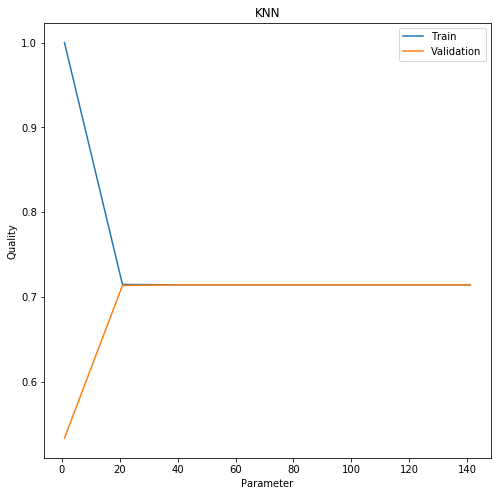

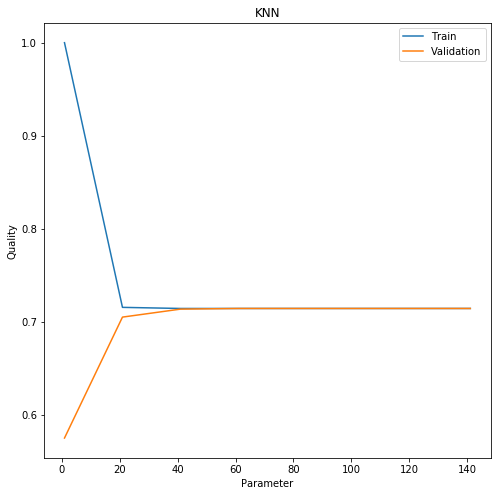

In [154]:
#KNearestNeighbors;
qual = np.zeros((len(ns), 3))
for ngr in range(1, 3):
    j = 0
    ngrams = (ngr,ngr)
    for i in ns:
        knc_ = KNeighborsClassifier(n_neighbors=i)
        qual[j][0], qual[j][1] = hyperparams_info(knc_, np.asarray(X_train), np.asarray(labels), ngrams)
        qual[j][2] = i
        j += 1
    # plot quality-parameter dependence;
    plotting([k[0] for k in qual], [k[1] for k in qual], ns, 'KNN')
    # find best validation result;
    tmp = max(qual, key=lambda a: a[1])
    print('------------------TRAIN_KFOLD------------------',
          'ngrams - {}'.format(ngrams),
          'n-neigbours - {}'.format(tmp[-1]),
          'result validation - {}'.format(tmp[1]),
          'result train - {}'.format(tmp[0]),
          sep = '\n'
         )
    # fit best model on train data and validate on test from task 1;
    vec = TfidfVectorizer(lowercase=True, ngram_range=ngrams)
    tr = vec.fit_transform(X_train)
    ts = vec.transform(X_test)
    knc_ = KNeighborsClassifier(n_neighbors=int(tmp[-1]))
    knc_.fit(tr, y_train)
    y_pred = knc_.predict(ts)
    print('------------------TRAIN+TEST------------------',
          'n-neigbours - {}'.format(tmp[-1]),
          'ngrams - {}'.format(ngrams),
          'Result: {}'.format(accuracy_score(y_test, y_pred)),
          sep='\n'
         )
    print('Time measurement')
    time_measure(knc_, tr, ts, labels, 1400)

При одном соседе модель просто выучила обучающую выборку и очень плохо отработала на валидации, что и ожидаемо.
Начиная с 61 соседа качество не менялось.

------------------TRAIN_KFOLD------------------
ngrams - (1, 1)
C - 0.01
result validation - 0.7142857142857142
result train - 0.7142857142857143
------------------TRAIN+TEST------------------
C - 0.01
ngrams - (1, 1)
Result: 0.48
--->LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12345, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
 fitting time:
CPU times: user 196 ms, sys: 4 ms, total: 200 ms
Wall time: 116 ms
prediction time:
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 833 µs
------------------TRAIN_KFOLD------------------
ngrams - (2, 2)
C - 26.826957952797247
result validation - 0.715
result train - 0.9988095238095238
------------------TRAIN+TEST------------------
C - 26.826957952797247
ngrams - (2, 2)
Result: 0.85
--->LogisticRegression(C=26.826957952797247, class_weight=None, dual=False,
          fit_inte

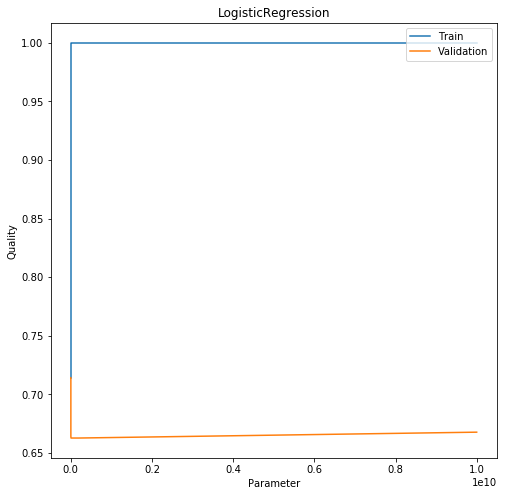

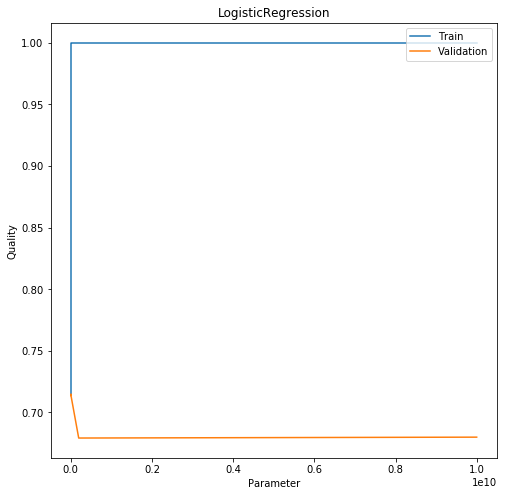

In [155]:
#LogisticRegression
qual = np.zeros((len(cs), 3))
for ngr in range(1, 3):
    j = 0
    ngrams = (ngr,ngr)
    for i in cs:
        logr_ = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100,
                          C=i, solver="lbfgs", random_state=12345)
        qual[j][0], qual[j][1] = hyperparams_info(logr_, np.asarray(X_train), np.asarray(labels), ngrams)
        qual[j][2] = i
        j += 1
    plotting([k[0] for k in qual], [k[1] for k in qual], cs, 'LogisticRegression')
        
    tmp = max(qual, key=lambda a: a[1])
    print('------------------TRAIN_KFOLD------------------',
          'ngrams - {}'.format(ngrams),
          'C - {}'.format(tmp[-1]),
          'result validation - {}'.format(tmp[1]),
          'result train - {}'.format(tmp[0]),
          sep = '\n'
         )
    logr_ = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100,
                        C=tmp[-1], solver="lbfgs", random_state=12345)
    # fit best model on train data and validate on test from task 1;
    vec = TfidfVectorizer(lowercase=True, ngram_range=ngrams)
    tr = vec.fit_transform(X_train)
    ts = vec.transform(X_test)
    logr_.fit(tr, y_train)
    y_pred = logr_.predict(ts)
    print('------------------TRAIN+TEST------------------',
          'C - {}'.format(tmp[-1]),
          'ngrams - {}'.format(ngrams),
          'Result: {}'.format(accuracy_score(y_test, y_pred)),
          sep='\n'
         )
    
    time_measure(logr_, tr, ts, labels, 1400)

------------------TRAIN_KFOLD------------------
ngrams - (1, 1)
alpha - 0.3727593720314942
result validation - 0.7142857142857142
result train - 0.7169047619047619
------------------TRAIN+TEST------------------
alpha - 0.3727593720314942
ngrams - (1, 1)
Result: 0.8066666666666666
--->MultinomialNB(alpha=0.37275937203149417, class_prior=None, fit_prior=True)
 fitting time:
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 6.97 ms
prediction time:
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.66 ms
------------------TRAIN_KFOLD------------------
ngrams - (2, 2)
alpha - 0.07196856730011521
result validation - 0.715
result train - 0.9988095238095238
------------------TRAIN+TEST------------------
alpha - 0.07196856730011521
ngrams - (2, 2)
Result: 0.8333333333333334
--->MultinomialNB(alpha=0.071968567300115208, class_prior=None, fit_prior=True)
 fitting time:
CPU times: user 44 ms, sys: 0 ns, total: 44 ms
Wall time: 44.8 ms
prediction time:
CPU times: user 8 ms, sys: 0 ns,

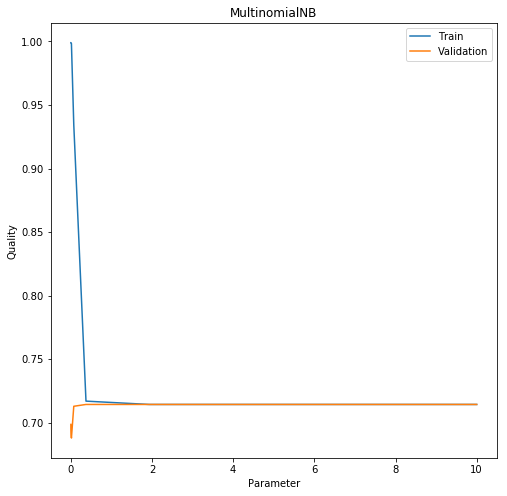

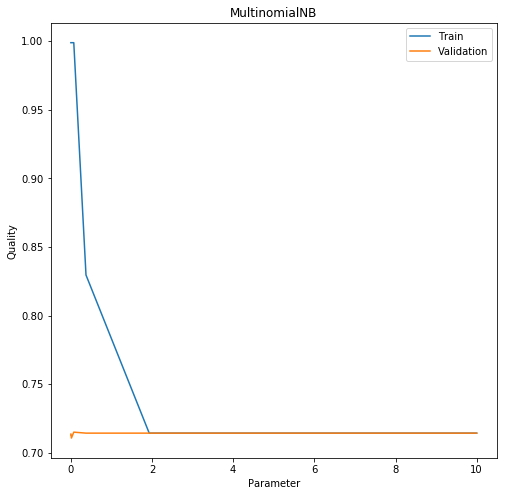

In [158]:
#MultinomialNB
qual = np.zeros((len(alphas), 3))
for ngr in range(1, 3):
    j = 0
    ngrams = (ngr,ngr)
    for i in alphas:
        mnb_ = MultinomialNB(alpha=i)
        qual[j][0], qual[j][1] = hyperparams_info(mnb_, np.asarray(X_train), np.asarray(labels), ngrams)
        qual[j][2] = i
        j += 1
    plotting([k[0] for k in qual], [k[1] for k in qual], alphas, 'MultinomialNB')
        
    tmp = max(qual, key=lambda a: a[1])
    print('------------------TRAIN_KFOLD------------------',
          'ngrams - {}'.format(ngrams),
          'alpha - {}'.format(tmp[-1]),
          'result validation - {}'.format(tmp[1]),
          'result train - {}'.format(tmp[0]),
          sep = '\n'
         )
    mnb_ = MultinomialNB(alpha=tmp[-1])
     # fit best model on train data and validate on test from task 1;
    vec = TfidfVectorizer(lowercase=True, ngram_range=ngrams)
    tr = vec.fit_transform(X_train)
    ts = vec.transform(X_test)
    mnb_.fit(tr, y_train)
    y_pred = mnb_.predict(ts)
    print('------------------TRAIN+TEST------------------',
          'alpha - {}'.format(tmp[-1]),
          'ngrams - {}'.format(ngrams),
          'Result: {}'.format(accuracy_score(y_test, y_pred)),
          sep='\n'
         )
    
    time_measure(mnb_, tr, ts, labels, 1400)

### Ngrams = 2
[some info about choosing n-grams and cv](https://stats.stackexchange.com/questions/155483/estimating-the-best-length-of-n-gram) <br> </br>
*что означает n-gram=2?* <br> </br>
если n-gram=1 будет считать вероятность встретить определенное слово, то n-gram=2 будет парсить строку на посл-ти из двух слов.
(перекрест в одно слово: … to be or not to be …	=> …, to be, be or, or not, not to, to be, …)

## Задача 4. (опционально)
#### Исследование влияния количества признаков FeatureHasher на качество классификации (+3 балла к сумме по всем ДЗ) 

<p>Изучите, что такое feature hashing (достаточно разобаться с документацией sklearn) и кратко опишите. Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [ ]:
n_features = np.logspace(1, 5, 5, base=10) # количество признаков
non_negative=True

<p>В этом задании можно воспользоваться GridSearchCV</p>

# Задача 5. (опционально)
__Простой прототип (+ 2 балла к сумме по всем ДЗ)__

Напишите функцию, которая берет на вход произвольную строку и возвращает для нее предсказание для вашей задачи. Придумайте по 3 примера строк для положительного и отрицательного класса, сделайте для них предсказание. Совпадают ли ваши метки и предсказания классификатора? Оцените (любым способом), насколько придуманные вами тексты похожи на объекты датасета, с которым вы работали.


In [ ]:
def predict_class_for_text(s):
    pass